In [1]:
import os
import sys

import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio

In [2]:
tasga_exp_file = '/g/data/e14/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Ayr/tas/gn/v20190429/tasga_Ayr_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
tasga_cntrl_file = '/g/data/e14/dbi599/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Ayr/tas/gn/v20190429/tasga_Ayr_CanESM5_piControl_r1i1p1f1_gn_520101-620012.nc'
pe_cntrl_file = '/g/data/e14/dbi599/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Ayr/pe/gn/v20190429/pe-region-sum_Ayr_CanESM5_piControl_r1i1p1f1_gn_520101-620012.nc'
pe_exp_file = '/g/data/e14/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Ayr/pe/gn/v20190429/pe-region-sum-anomaly_Ayr_CanESM5_historical_r1i1p1f1_gn_185001-201412-cumsum.nc'

In [3]:
tasga_exp_cube = iris.load_cube(tasga_exp_file, 'air_temperature')
tasga_cntrl_cube = iris.load_cube(tasga_cntrl_file, 'air_temperature')
pe_cntrl_cube = iris.load_cube(pe_cntrl_file, 'precipitation minus evaporation flux')
pe_exp_cube = iris.load_cube(pe_exp_file, 'precipitation minus evaporation flux')

In [4]:
time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])

In [5]:
tasga_exp_cube = tasga_exp_cube.extract(time_constraint)
pe_exp_cube = pe_exp_cube.extract(time_constraint)

In [6]:
assert tasga_exp_cube.shape[0] == 145
assert pe_exp_cube.shape[0] == 145

## Global average temperature

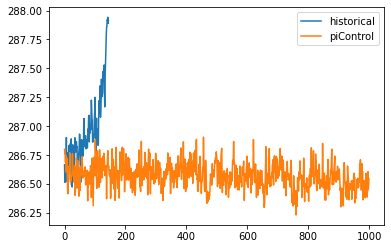

In [7]:
plt.plot(tasga_exp_cube.data, label='historical')
plt.plot(tasga_cntrl_cube.data, label='piControl')
plt.legend()
plt.show()

In [8]:
baseline_tasga = tasga_cntrl_cube.data.mean()

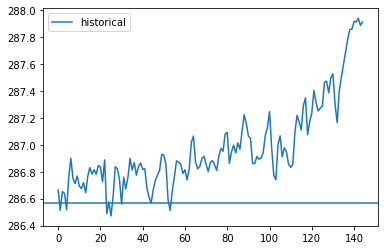

In [9]:
plt.plot(tasga_exp_cube.data, label='historical')
plt.axhline(baseline_tasga)
plt.legend()
plt.show()

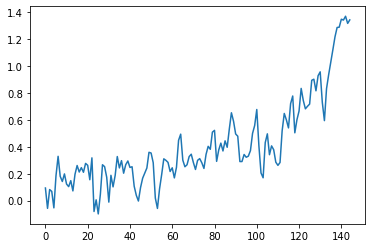

In [10]:
tasga_exp_anomaly = tasga_exp_cube.data - baseline_tasga
plt.plot(tasga_exp_anomaly)
plt.show()

## 7% global P-E timeseries

In [11]:
pe_cntrl_clim_cube = pe_cntrl_cube.collapsed('time', iris.analysis.MEAN)
pe_cntrl_clim_cube.remove_coord('time')

In [12]:
# pereg: SH_precip SH_evap tropical_precip NH_evap NH_precip globe
# basin: atlantic pacific indian arctic marginal_seas land ocean globe        
ave_global_transport = pe_cntrl_clim_cube.data[0, -1] + pe_cntrl_clim_cube.data[2, -1] + pe_cntrl_clim_cube.data[4, -1]

In [13]:
print(ave_global_transport)

1.5758691382902576e+17


In [14]:
pe_cntrl_clim_cube.data[1, -1] + pe_cntrl_clim_cube.data[3, -1]

-1.576162442698746e+17

In [15]:
sevenpct_anomaly_data = tasga_exp_anomaly * 0.07 * ave_global_transport

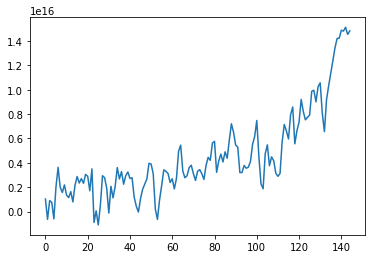

In [16]:
plt.plot(sevenpct_anomaly_data)
plt.show()

## Experiment versus 7%

In [17]:
sevenpct_anomaly_cumsum_data = np.cumsum(sevenpct_anomaly_data) - sevenpct_anomaly_data[0]

In [18]:
exp_cumsum_data = pe_exp_cube.data[:, 0, -1] + pe_exp_cube.data[:, 2, -1] + pe_exp_cube.data[:, 4, -1]
exp_anomaly_cumsum_data = exp_cumsum_data - exp_cumsum_data[0]

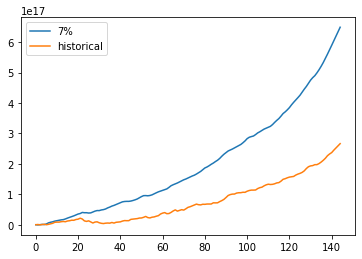

In [19]:
plt.plot(sevenpct_anomaly_cumsum_data, label='7%')
plt.plot(exp_anomaly_cumsum_data, label='historical')
plt.legend()
plt.show()

In [25]:
fraction_of_7pct = exp_anomaly_cumsum_data[-1] / sevenpct_anomaly_cumsum_data[-1]
fraction_of_7pct

0.41051109290596405

In [26]:
fraction_of_7pct * 7

2.8735776503417485